# Která denní hodina je nejlepší na cestování s kočárkem?

## Autorka: Mgr. Anastázie Sedláková, PhD [sedlakovi.org](https://www.sedlakovi.org/)

Tento notebook je druhý ze série notebooků, kde zjišťuji, jak lze co nejpohodlněji cestovat s kočárkem v Praze. 
Cílem tohoto notebooku je určit, ve kterou denní dobu je v Praze nejvíce a nejméně nízkopodlažních spojů.

*Pozn. nepracuji tady s daty v reálném čase, takže se jedná o počet garantovaných nízkopodlažních vozů* 

## Data

[Pražská integrovaná doprava](https://pid.cz/o-systemu/opendata/) poskytuje otevřená data o provozu MHD. Některá data jsou aktualizovaná jednou za 14 dní a jsou ve formátu [GTFS](https://developers.google.com/transit/gtfs/reference). Jsou dostupná i data o provozu v reálném čase, ze kterých čerpají aplikace vyhledávající spojení.

Pro tento notebook jsem použila:
- [trips.txt](https://developers.google.com/transit/gtfs/reference#tripstxt) obsahující jizdní řády linek včetně informací o tom, zda se jedná o nízkopodlažní spoj.
- [stop_times.txt](https://developers.google.com/transit/gtfs/reference#stop_timestxt) obsahující informaci o tom, v jakém čase je spoj na jaké zastávce.
- [calendar.txt](https://developers.google.com/transit/gtfs/reference#calendartxt) obsahující informaci o tom, v jaký den daný spoj jezdí.

## Analýza

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
trips = pd.read_csv('./data/trips.txt')
trips.head()

/tmp/ipykernel_93165/3737955811.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('./data/trips.txt')


,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,exceptional,sub_agency_id
0,L991,1111100-1,991_1342_220901,Nemocnice Motol,NaN,0,NaN,L991V1,1,1,0,1
1,L991,1111100-1,991_1343_220901,Depo Hostivař,NaN,1,NaN,L991V2,1,1,0,1
2,L991,1111100-1,991_1344_220901,Nemocnice Motol,NaN,0,NaN,L991V3,1,1,0,1
3,L991,1111100-1,991_1345_220901,Depo Hostivař,NaN,1,NaN,L991V4,1,1,0,1
4,L991,1111100-1,991_1346_220901,Nemocnice Motol,NaN,0,NaN,L991V5,1,1,0,1


Zajímají mě jen tramvaje. Ty jsou označeny `L` a číslo linky.

In [3]:
trams = [f'L{i}' for i in range(1,27)]

V datech ponechám jenom tramvaje a jenom pravidelné spoje.

In [4]:
trips = trips[(trips['route_id'].isin(trams)) & (trips['exceptional'] == 0)]
trips.shape

(16189, 12)

In [5]:
stop_times = pd.read_csv('./data/stop_times.txt')
stop_times.head()

/tmp/ipykernel_93165/2583707040.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv('./data/stop_times.txt')


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,trip_operation_type,bikes_allowed
0,991_1342_220901,7:22:55,7:22:55,U953Z102P,1,NaN,0,0,0.000000,1,1
1,991_1342_220901,7:25:00,7:25:30,U713Z102P,2,NaN,0,0,1.389436,1,1
2,991_1342_220901,7:27:00,7:27:30,U921Z102P,3,NaN,0,0,2.625322,1,1
3,991_1342_220901,7:28:45,7:29:05,U118Z102P,4,NaN,0,0,3.570817,1,1
4,991_1342_220901,7:30:15,7:30:35,U209Z102P,5,NaN,0,0,4.434345,1,1


Spojím `trips`, `stop_times` a `calendar`.

In [6]:
calendar = pd.read_csv('./data/calendar.txt')
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1111100-1,1,1,1,1,1,0,0,20221215,20221223
1,1111100-2,1,1,1,1,1,0,0,20221215,20221228
2,1111111-1,1,1,1,1,1,1,1,20221215,20221228
3,1111111-2,1,1,1,1,1,1,1,20221215,20221228
4,1111110-1,1,1,1,1,1,1,0,20221215,20221223


In [7]:
merged = pd.merge(trips, stop_times, on='trip_id', how='left')
merged.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed_x,exceptional,sub_agency_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,trip_operation_type,bikes_allowed_y
0,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:50:00,5:50:00,U541Z1P,1,NaN,0,0,0.000000,1,2
1,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:51:00,5:51:00,U507Z1P,2,NaN,0,0,0.410706,1,2
2,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:52:00,5:52:00,U844Z1P,3,NaN,0,0,0.874539,1,2
3,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:53:00,5:53:00,U858Z1P,4,NaN,0,0,1.567009,1,2
4,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:55:00,5:55:00,U15Z1P,5,NaN,3,3,2.254233,1,2


In [8]:
merged = pd.merge(merged, calendar, on='service_id', how='left')
merged.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed_x,exceptional,sub_agency_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,trip_operation_type,bikes_allowed_y,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:50:00,5:50:00,U541Z1P,1,NaN,0,0,0.000000,1,2,1,1,1,1,1,0,0,20221215,20221215
1,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:51:00,5:51:00,U507Z1P,2,NaN,0,0,0.410706,1,2,1,1,1,1,1,0,0,20221215,20221215
2,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:52:00,5:52:00,U844Z1P,3,NaN,0,0,0.874539,1,2,1,1,1,1,1,0,0,20221215,20221215
3,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:53:00,5:53:00,U858Z1P,4,NaN,0,0,1.567009,1,2,1,1,1,1,1,0,0,20221215,20221215
4,L1,1111100-4,1_5231_221004,Sídliště Ďáblice,NaN,0,NaN,L1V2,1,0,0,1,5:55:00,5:55:00,U15Z1P,5,NaN,3,3,2.254233,1,2,1,1,1,1,1,0,0,20221215,20221215


In [9]:
merged.shape

(519449, 31)

Z času vyextrahuji hodinu.

In [10]:
merged['hour'] = merged['arrival_time'].str.split(':').str.get(0).astype(int)

Dle [dokumentace](https://developers.google.com/transit/gtfs/reference#stop_timestxt) čas, který je více než 24:00:00 značí spoj v servisní den. Proto tyto časy z dat odstraním. 

In [11]:
merged = merged[merged['hour'] < 24]
merged.shape

(517980, 32)

Budu analyzovat zvlášť spoje v pracovní dny a o víkendu.

In [12]:
weekdays = merged[(merged['saturday'] == 0) & (merged['saturday'] == 0)]
weekdays.shape

(400054, 32)

In [13]:
weekend = merged[(merged['saturday'] == 1) & (merged['saturday'] == 1)]
weekend.shape

(117926, 32)

Jelikož se chci dívat na počty spojů v různé hodiny, musím v datech každý spoj ponechat jen jednou. Proto jsem se rozhodla, že u každého spoje zjistím prostřední zastávku a vezmu její čas. Data seskupím podle linky a spoje a zjistím čas prostřední zastávky.

In [14]:
def get_middle_time(df):
    return df.iloc[int(len(df)/2)][['hour', 'wheelchair_accessible']]

In [15]:
weekdays_trips_middle_time = weekdays.groupby(['route_id', 'trip_id']).apply(get_middle_time).reset_index()
weekdays_trips_middle_time.head()

,route_id,trip_id,hour,wheelchair_accessible
0,L1,1_2991_221216,17,2
1,L1,1_3001_221216,15,2
2,L1,1_4009_221216,5,1
3,L1,1_4847_220926,7,1
4,L1,1_4849_220926,9,1


In [16]:
weekend_trips_middle_time = weekend.groupby(['route_id', 'trip_id']).apply(get_middle_time).reset_index()
weekend_trips_middle_time.head()

,route_id,trip_id,hour,wheelchair_accessible
0,L1,1_1930_221217,9,1
1,L1,1_1932_221217,12,1
2,L1,1_1937_221217,9,1
3,L1,1_1939_221217,12,1
4,L1,1_1944_221217,10,1


Data seskupím podle hodíny a toho, zda je spoj nízkopodlažní. 

In [17]:
weekdays_trips_hours = weekdays_trips_middle_time.groupby(
    ['hour', 'wheelchair_accessible']
)[['trip_id']].count().unstack()
weekdays_trips_hours

trip_id     
wheelchair_accessible       1    2
hour                              
4                           8    3
5                         118   66
6                         331  208
7                         568  432
8                         639  407
9                         610  304
10                        554  278
11                        509  262
12                        494  271
13                        496  268
14                        490  283
15                        519  348
16                        547  435
17                        545  441
18                        437  352
19                        261  227
20                        103  155
21                         85  125
22                         54  116
23                         52   91

In [18]:
weekend_trips_hours = weekend_trips_middle_time.groupby(
    ['hour', 'wheelchair_accessible']
)[['trip_id']].count().unstack()
weekend_trips_hours

trip_id    
wheelchair_accessible       1   2
hour                             
4                           8   1
5                          81   5
6                         113  15
7                         135  13
8                         160  27
9                         177  34
10                        180  32
11                        181  33
12                        176  38
13                        178  38
14                        180  36
15                        182  33
16                        223  43
17                        272  46
18                        210  39
19                        173  26
20                        160  27
21                        129  32
22                        105  29
23                         90  32

Ze seskupených dat udělám také poměr vysoko a nízkopodlažních spojů pro každou hodinu.

In [19]:
pd.DataFrame(weekdays_trips_middle_time.groupby(
    ['hour']
)[['wheelchair_accessible']].value_counts(normalize=True))

0
hour wheelchair_accessible          
4    1                      0.727273
     2                      0.272727
5    1                      0.641304
     2                      0.358696
6    1                      0.614100
     2                      0.385900
7    1                      0.568000
     2                      0.432000
8    1                      0.610899
     2                      0.389101
9    1                      0.667396
     2                      0.332604
10   1                      0.665865
     2                      0.334135
11   1                      0.660182
     2                      0.339818
12   1                      0.645752
     2                      0.354248
13   1                      0.649215
     2                      0.350785
14   1                      0.633894
     2                      0.366106
15   1                      0.598616
     2                      0.401384
16   1                      0.557026
     2                      0.442974
17   1                      0.552738
     2                      0.447262
18   1                      0.553866
     2                      0.446134
19   1                      0.534836
     2                      0.465164
20   2                      0.600775
     1                      0.399225
21   2                      0.595238
     1                      0.404762
22   2                      0.682353
     1                      0.317647
23   2                      0.636364
     1                      0.363636

In [20]:
pd.DataFrame(weekend_trips_middle_time.groupby(
    ['hour']
)[['wheelchair_accessible']].value_counts(normalize=True))

0
hour wheelchair_accessible          
4    1                      0.888889
     2                      0.111111
5    1                      0.941860
     2                      0.058140
6    1                      0.882812
     2                      0.117188
7    1                      0.912162
     2                      0.087838
8    1                      0.855615
     2                      0.144385
9    1                      0.838863
     2                      0.161137
10   1                      0.849057
     2                      0.150943
11   1                      0.845794
     2                      0.154206
12   1                      0.822430
     2                      0.177570
13   1                      0.824074
     2                      0.175926
14   1                      0.833333
     2                      0.166667
15   1                      0.846512
     2                      0.153488
16   1                      0.838346
     2                      0.161654
17   1                      0.855346
     2                      0.144654
18   1                      0.843373
     2                      0.156627
19   1                      0.869347
     2                      0.130653
20   1                      0.855615
     2                      0.144385
21   1                      0.801242
     2                      0.198758
22   1                      0.783582
     2                      0.216418
23   1                      0.737705
     2                      0.262295

Vykreslím počet spojů u jednotlivých linek, abych se podívala, jaký je počet sppojů v různou denní dobu. Tento graf není moc vizuálně přívětivý, slouží jen pro kontrolu distribuce spojů u jednotlivých linek.

In [21]:
def plot_lines(df, days):
    fig, ax = plt.subplots(figsize =(10, 6))
    for route_id in df['route_id'].unique():
        temp_df = df[df['route_id'] == route_id].hour.value_counts().sort_index()
        plt.plot(temp_df.index, temp_df.values)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Počet spojů tramvají - {days}')
    plt.ylabel('Počet spojů')
    plt.xlabel('Hodina')
    plt.show()

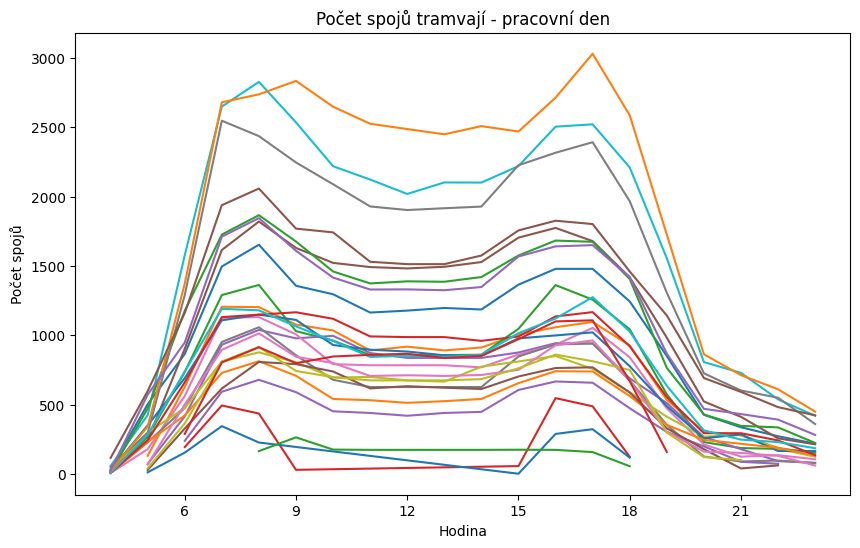

In [22]:
plot_lines(weekdays, 'pracovní den')

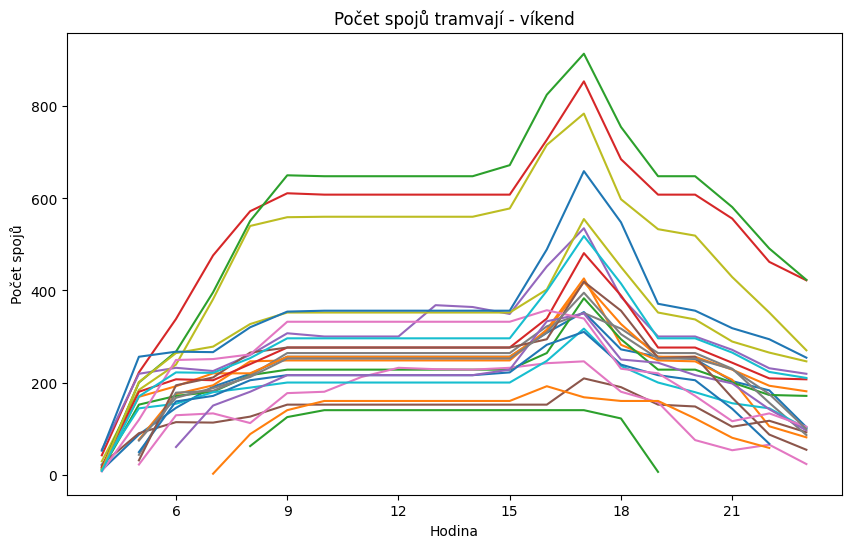

In [23]:
plot_lines(weekend, 'víkend')

Hlavní vizualizace se skládá ze dvou grafů distribuce vysoko a nízkopodlažních spojů v pracovní dny a o víkendu.

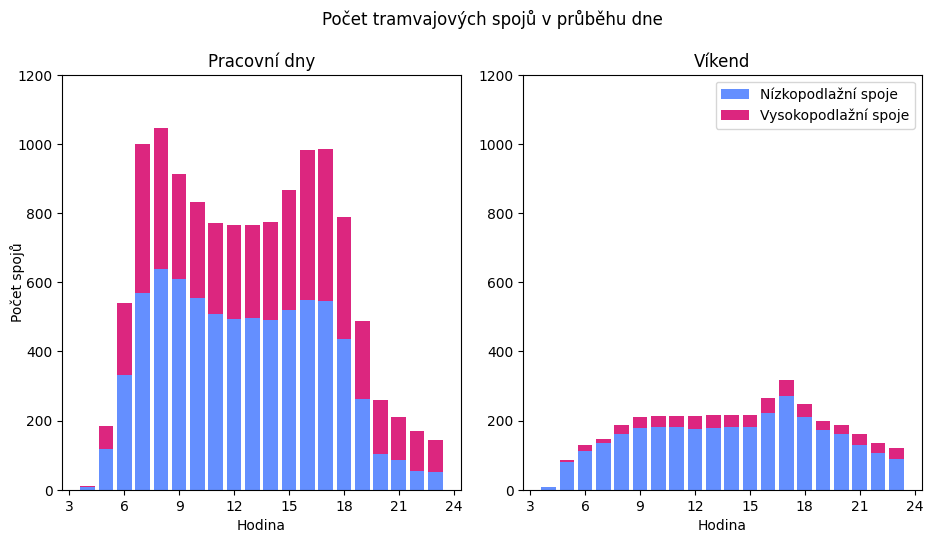

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax1.bar(
    weekdays_trips_hours.index, weekdays_trips_hours[('trip_id', 1)], label='Nízkopodlažní spoje', color='#648fff'
)
ax1.bar(
    weekdays_trips_hours.index, weekdays_trips_hours[('trip_id', 2)], 
    bottom=weekdays_trips_hours[('trip_id', 1)], label='Vysokopodlažní spoje', color='#dc267f'
)
ax1.set_ylim(0, 1200)
ax1.set_xlabel('Hodina')
ax1.set_title('Pracovní dny')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.bar(
    weekend_trips_hours.index, weekend_trips_hours[('trip_id', 1)], label='Nízkopodlažní spoje', color='#648fff'
)
ax2.bar(
    weekend_trips_hours.index, weekend_trips_hours[('trip_id', 2)], 
    bottom=weekend_trips_hours[('trip_id', 1)], label='Vysokopodlažní spoje', color='#dc267f'
)
ax2.set_ylim(0, 1200)
ax2.set_xlabel('Hodina')
ax2.set_title('Víkend')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel('Počet spojů')
plt.title('Počet tramvajových spojů v průběhu dne\n\n')
fig.tight_layout()
plt.show()

Několik poznatků z grafu:
1. V pracovní dny a o víkendu je jiný počet spojů a jiná distribuce spojů.
2. Je logické, že je v době špičky v pracovní dny velký počet vyskopodlažních spojů. Je ovšem překvapivé, že ve večerních hodinách (8. večer a později) je více než polovina spojů vysokopodlažních.
3. Asi z nějakých technických důvodu (např. výchozí nebo konečná vozovna) o víkendu jezdí vysokopodlažní spoje - i když je jich mnohém méně než v pracovní dny a určitě je dost nízkopodlažních vozů, které by pokryly provoz o víkendu.
4. Asi z podobných důvodů jako v bodě č. 3 se v pracovní dny po ranní špičce (8. hodina ranní) zmenšuje počet nejen vysokopodlažních, ale i nízkopodlažních spojů.

Ideální situace by byla, kdyby se využilo maximální množství nízkopodlažních vozů a vysokopodlažní by se používaly jen ve špičce.

Takže čístě podle počtu nízkopodlažních tramají je nejlepší jet s kočárkem ve špičce.

Zvlášť grafy pro pracovní dny a víkend.

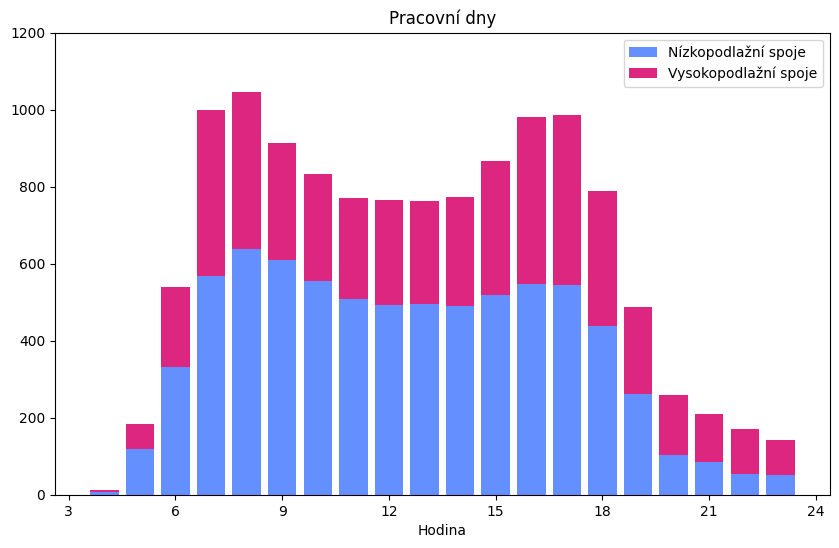

In [25]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.bar(weekdays_trips_hours.index, weekdays_trips_hours[('trip_id', 1)], label='Nízkopodlažní spoje', color='#648fff')
ax.bar(
    weekdays_trips_hours.index, weekdays_trips_hours[('trip_id', 2)], 
    bottom=weekdays_trips_hours[('trip_id', 1)], label='Vysokopodlažní spoje', color='#dc267f'
)
plt.ylim(0, 1200)
plt.xlabel('Hodina')
plt.title('Pracovní dny')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

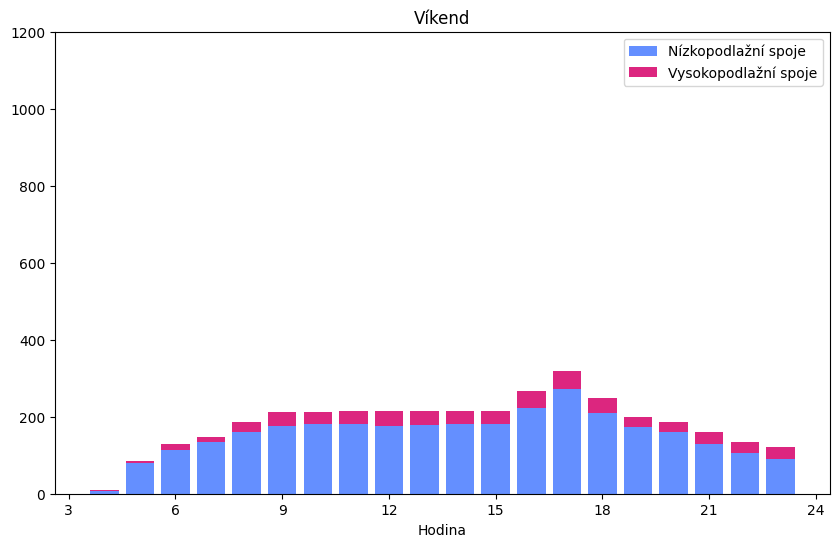

In [26]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.bar(weekend_trips_hours.index, weekend_trips_hours[('trip_id', 1)], label='Nízkopodlažní spoje', color='#648fff')
ax.bar(
    weekend_trips_hours.index, weekend_trips_hours[('trip_id', 2)], 
    bottom=weekend_trips_hours[('trip_id', 1)], label='Vysokopodlažní spoje', color='#dc267f'
)
plt.ylim(0, 1200)
plt.xlabel('Hodina')
plt.title('Víkend')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()